In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# load dataset
dataset=pd.read_csv('D:\DA\Sem 2\Capstone\Assignment 1\CancerPScreenRaw2020.csv')
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,271.996240,235.070094,0.752483,36.034604,11.808232,4.092972,33.969549,63.846127,93.722704,0.0
1,223.724058,224.347244,0.824954,33.601107,10.770778,2.322102,30.433429,58.544756,86.656083,0.0
2,246.553358,213.081332,0.682095,32.663880,10.703675,3.710110,30.791993,57.873877,84.955761,0.0
3,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0
4,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0


In [5]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
cap2 = pp.ProfileReport(dataset)
cap2.to_file('cap2.html')
display(IFrame('cap2.html', width=900, height=350))

In [6]:
#Summary of N/A Values
dataset.isnull().sum()

V1       10
V2       10
V3       10
V4       10
V5       10
V6       10
V7       10
V8       10
V9       10
Class    10
dtype: int64

In [7]:
#Drop rows where all cells in that row is NA
dataset = dataset.dropna(how='all',axis=0).reset_index(drop = True)
dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,271.996240,235.070094,0.752483,36.034604,11.808232,4.092972,33.969549,63.846127,93.722704,0.0
1,223.724058,224.347244,0.824954,33.601107,10.770778,2.322102,30.433429,58.544756,86.656083,0.0
2,246.553358,213.081332,0.682095,32.663880,10.703675,3.710110,30.791993,57.873877,84.955761,0.0
3,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0
4,207.353626,209.644809,0.720148,32.415557,9.530960,2.157191,29.610676,57.064161,84.517647,0.0
...,...,...,...,...,...,...,...,...,...,...
1675,149.088971,159.661076,0.675176,23.458321,8.938000,59.159182,21.873173,-15.412836,-52.698846,2.0
1676,153.203474,164.067344,0.693809,24.105715,9.184668,60.791836,22.476821,-15.838194,-54.153209,2.0
1677,138.008265,153.870445,0.673809,22.985824,8.175149,61.182554,21.391324,-18.399906,-58.191137,2.0
1678,138.008265,153.870445,0.673809,22.985824,8.175149,61.182554,21.391324,-18.399906,-58.191137,2.0


In [8]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(dataset.drop('Class',axis=1),0,list(dataset.drop('Class',axis=1)))
dataset.drop('Class',axis=1).loc[Outliers_to_drop]

,V1,V2,V3,V4,V5,V6,V7,V8,V9
560,476.426612,322.386873,0.850293,46.666363,17.256893,23.699211,43.219864,62.740516,82.261169
561,472.345889,314.954572,0.883631,45.073220,17.613278,27.259269,43.288320,59.317371,75.346422
562,443.833590,309.803533,0.857603,43.206179,17.007015,37.726836,41.485828,45.244820,49.003812
563,442.081040,309.071137,0.857025,42.796644,16.176084,28.992396,41.472420,53.952445,66.432469
565,440.331958,314.216109,0.826656,45.958020,15.423139,3.952445,41.445612,78.938779,116.431946
...,...,...,...,...,...,...,...,...,...
1677,138.008265,153.870445,0.673809,22.985824,8.175149,61.182554,21.391324,-18.399906,-58.191137
1678,138.008265,153.870445,0.673809,22.985824,8.175149,61.182554,21.391324,-18.399906,-58.191137
1679,141.816967,158.116906,0.692404,23.620178,8.400764,62.871048,21.981674,-18.907700,-59.797074
601,376.669151,275.606406,0.757999,40.083364,13.993352,2.131052,38.701605,75.272158,111.842711


In [9]:
#Create New Dataset without Outliers
dataset = dataset.drop(dataset.index[Outliers_to_drop]).reset_index(drop = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1560 non-null   float64
 1   V2      1560 non-null   float64
 2   V3      1560 non-null   float64
 3   V4      1560 non-null   float64
 4   V5      1560 non-null   float64
 5   V6      1560 non-null   float64
 6   V7      1560 non-null   float64
 7   V8      1560 non-null   float64
 8   V9      1560 non-null   float64
 9   Class   1560 non-null   float64
dtypes: float64(10)
memory usage: 122.0 KB


In [10]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
cap2 = pp.ProfileReport(dataset)
cap2.to_file('cap2.html')
display(IFrame('cap2.html', width=900, height=350))

In [11]:
#Show Key Statistics
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,190.630841,178.769031,0.635989,26.685542,8.984003,12.347625,24.667997,36.988370,49.308742,0.978205
std,75.396427,35.750096,0.071756,4.852122,2.211419,8.480083,5.013207,12.714660,21.943172,0.818821
min,77.506035,106.435661,0.451309,16.586642,4.780299,0.404557,14.655575,3.326351,-13.607345,0.000000
25%,125.265708,150.712853,0.584654,22.959222,7.218856,5.361532,20.835932,28.008704,34.521055,0.000000
50%,173.241514,174.114809,0.637838,26.091306,8.774178,10.614368,23.582325,36.584904,50.341177,1.000000
75%,245.821456,204.261594,0.682171,29.905825,10.549153,17.867986,28.426086,45.762494,64.471288,2.000000
max,416.523193,281.232571,0.835766,39.746384,15.531709,38.616223,38.669230,70.747750,104.417938,2.000000


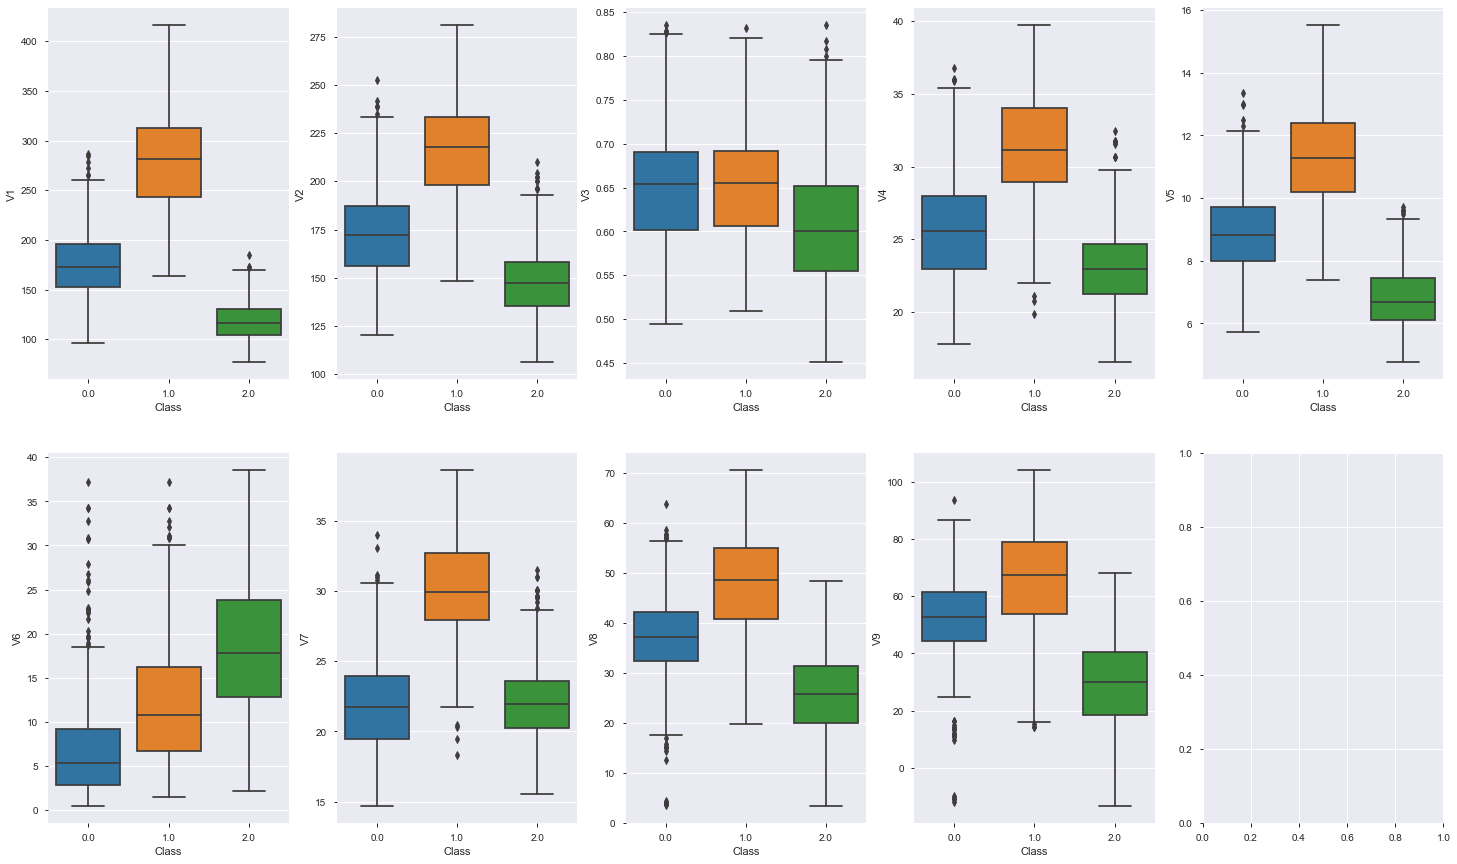

In [12]:
fig,ax=plt.subplots(nrows=2 ,ncols=5)

sns.boxplot(data=dataset,y='V1',x='Class',ax=ax[0,0])
sns.boxplot(data=dataset,y='V2',x='Class',ax=ax[0,1])
sns.boxplot(data=dataset,y='V3',x='Class',ax=ax[0,2])
sns.boxplot(data=dataset,y='V4',x='Class',ax=ax[0,3])
sns.boxplot(data=dataset,y='V5',x='Class',ax=ax[0,4])
sns.boxplot(data=dataset,y='V6',x='Class',ax=ax[1,0])
sns.boxplot(data=dataset,y='V7',x='Class',ax=ax[1,1])
sns.boxplot(data=dataset,y='V8',x='Class',ax=ax[1,2])
sns.boxplot(data=dataset,y='V9',x='Class',ax=ax[1,3])

fig.set_figwidth(25)
fig.set_figheight(15)

Class Split
0.0    540
1.0    514
2.0    506
Name: Class, dtype: int64


Text(0, 0.5, 'Count')

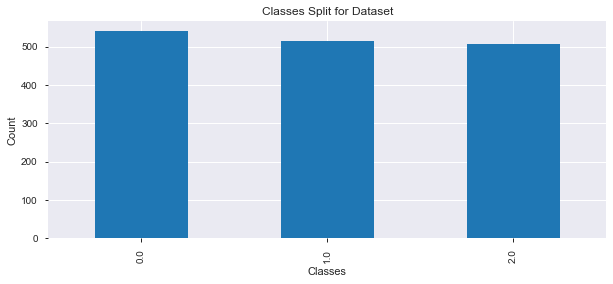

In [13]:
#Class Balance
print('Class Split')
print(dataset['Class'].value_counts())
dataset['Class'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [14]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('V2', 'V1'), ('V4', 'V1'), ('V4', 'V2'), ('V5', 'V1'), ('V5', 'V2'), ('V5', 'V4'), ('V7', 'V1'), ('V7', 'V2'), ('V7', 'V4'), ('V9', 'V8')]


<AxesSubplot:>

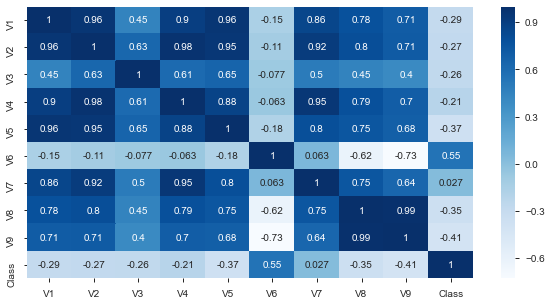

In [15]:
# Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")